# Week 7- Support Vector Machines

In this exercise, we'll demonstrate two use cases of using SVMs. The first will just be some intuition experimentation on some simple 2D example datasets. The second will be to use an SVM to classify emails.

## Simple 2D Examples

We have a few example datasets to explore the usage of SVMs 

### Example Dataset 1

Our first simple dataset is clearly linearly separable. Let's see how we can go about using the SVM to find the decision boundary.

#### Visualizing the Data

Let's first load and visualize the data.

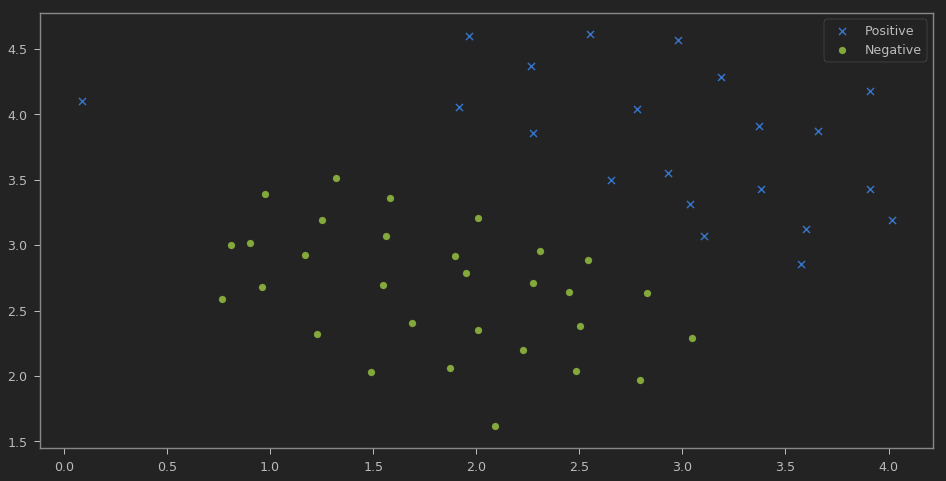

In [127]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

# Set the data path
dataDir = "./assignment/ex6/"
dataFile = "ex6data1.mat"
dataPath = dataDir+dataFile

# Load the data
data = loadmat(dataPath)
X = data['X']
y = data['y']

# Get positive and negative cases
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot the data
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[pos,0],X[pos,1], s=50, marker='x', label='Positive');
ax.scatter(X[neg,0],X[neg,1], s=50, marker='o', label='Negative');
ax.legend();

#### Running the SVM

There's one outlier here, but it's a pretty separable set of data. So now let's train a linear SVM to learn this boundary using two different parameter values.

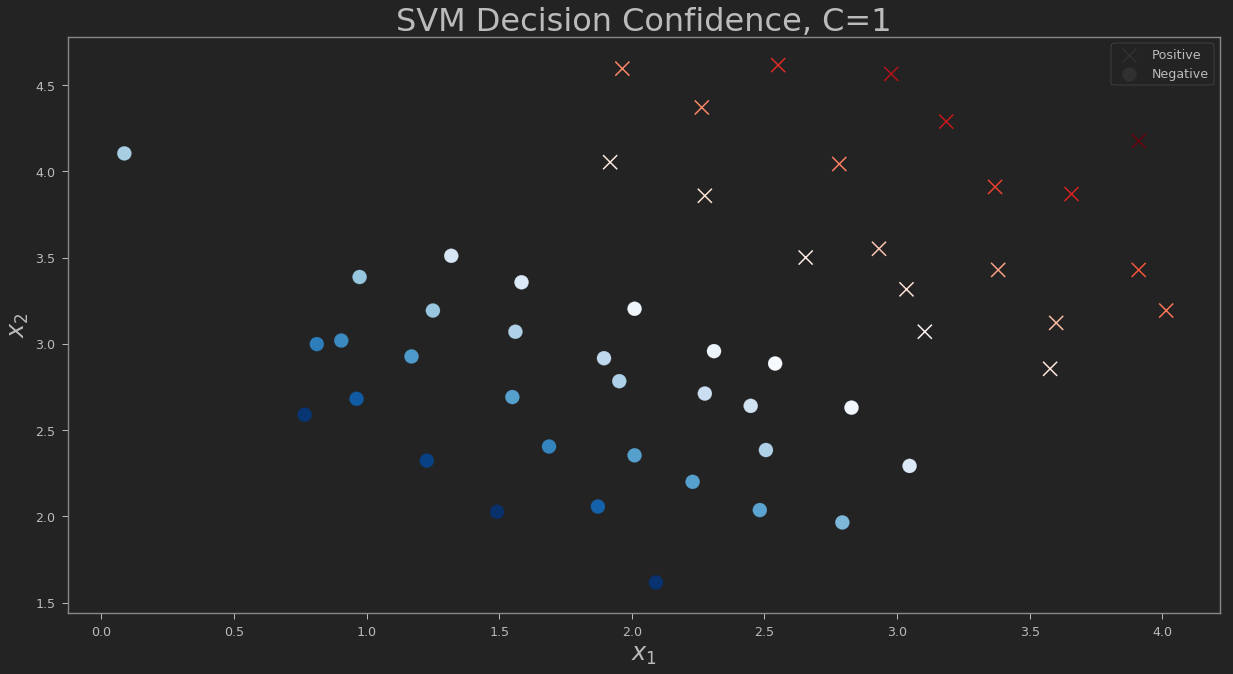

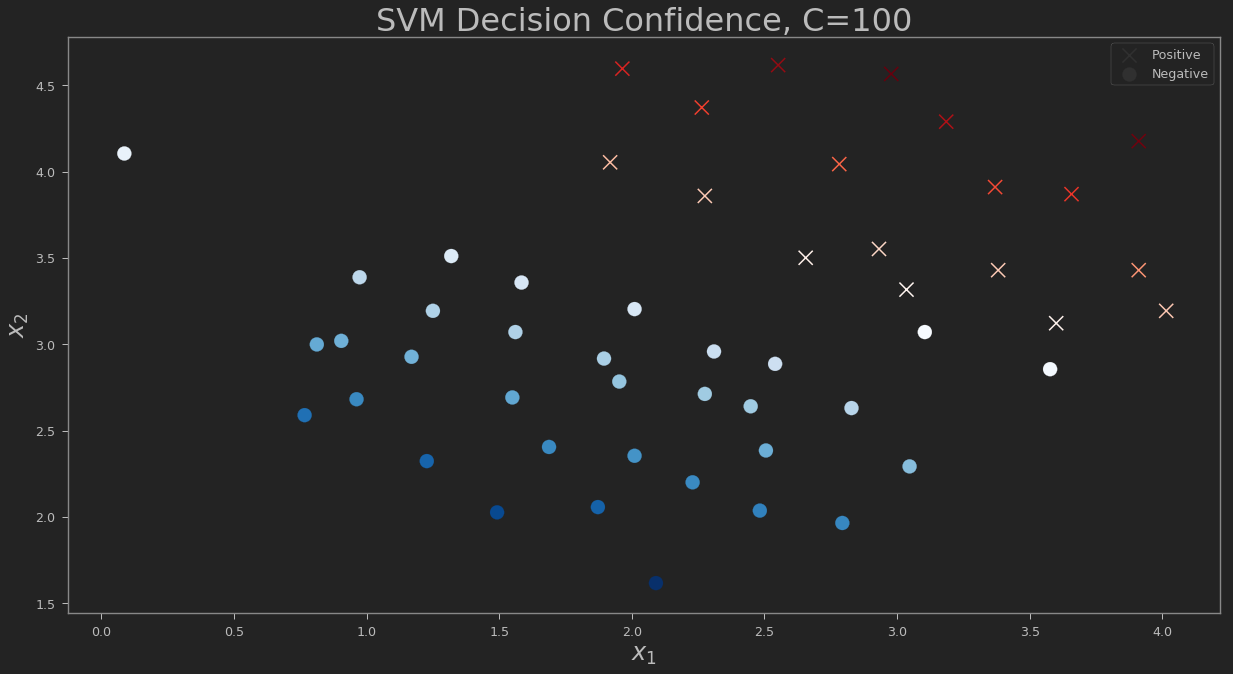

In [128]:
# Import module
from sklearn import svm

# Train the SVM
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc.fit(X,y)
confidence = svc.decision_function(X)

# Get the cases that were predicted positive or negative
pos = np.where(confidence>=0.0)[0]
neg = np.where(confidence<0.0)[0]

# Plot the data, colored by the confidence for each point
fig = plt.figure(figsize=(16,8));
ax = fig.add_axes([0,0,1,1]);
ax.scatter(X[pos,0],X[pos,1],s=200,marker='x',label='Positive',\
           c=svc.decision_function(X)[pos],cmap='Reds');
ax.scatter(X[neg,0],X[neg,1],s=200, marker='o', label='Negative',\
           c=-svc.decision_function(X)[neg],cmap='Blues');
ax.set_title('SVM Decision Confidence, C=1',fontsize=32);
ax.set_xlabel("$x_1$",fontsize=24);
ax.set_ylabel("$x_2$",fontsize=24);
ax.legend();

# Train the SVM
svc = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc.fit(X,y)
confidence = svc.decision_function(X)

# Get the cases that were predicted positive or negative
pos = np.where(confidence>=0.0)[0]
neg = np.where(confidence<0.0)[0]

# Plot the data, colored by the confidence for each point
fig = plt.figure(figsize=(16,8));
ax = fig.add_axes([0,0,1,1]);
ax.scatter(X[pos,0],X[pos,1],s=200,marker='x',label='Positive',\
           c=svc.decision_function(X)[pos],cmap='Reds');
ax.scatter(X[neg,0],X[neg,1],s=200, marker='o', label='Negative',\
           c=-svc.decision_function(X)[neg],cmap='Blues');
ax.set_title('SVM Decision Confidence, C=100',fontsize=32);
ax.set_xlabel("$x_1$",fontsize=24);
ax.set_ylabel("$x_2$",fontsize=24);
ax.legend();

We can see here that the different parameter values affect the classification from the SVM. The confidence is small, but the model is exhibiting high-variance for the large parameter value here.

### Example Dataset 2

We'll have a look at another dataset that is not linearly separable, and this time use a Gaussian kernel for our SVM.

#### Visualizing the Data

Let's first load and look at the new dataset.

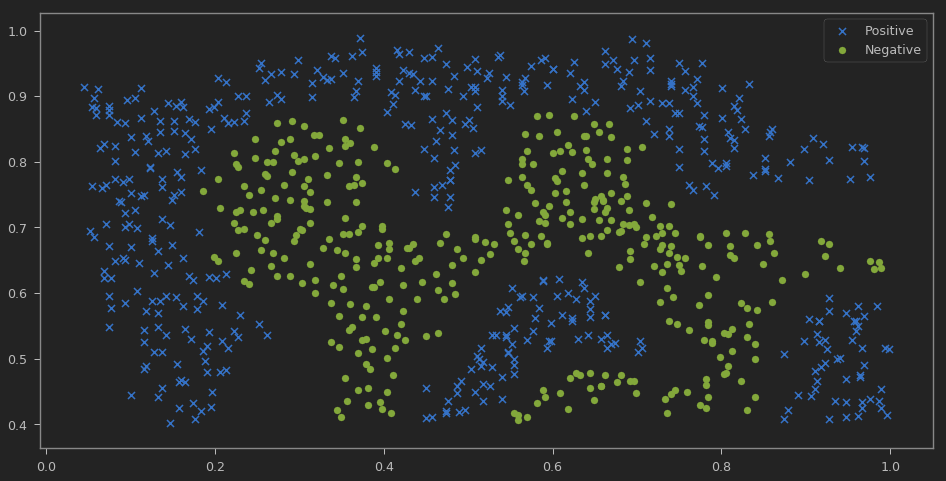

In [129]:
# Set the data path
dataDir = "./assignment/ex6/"
dataFile = "ex6data2.mat"
dataPath = dataDir+dataFile

# Load the data
data = loadmat(dataPath)
X = data['X']
y = data['y']

# Get positive and negative cases
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot the data
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[pos,0],X[pos,1], s=50, marker='x', label='Positive');
ax.scatter(X[neg,0],X[neg,1], s=50, marker='o', label='Negative');
ax.legend();

#### SVM with Gaussian Kernel

Let's now create a function for our Gaussian kernel.

In [130]:
def gaussian_kernel(x1, x2, sigma):
    
    """Gaussian kernel used for the SVM"""
    
    # Cast as matrices
    x1 = np.matrix(x1)
    x2 = np.matrix(x2)
    
    # Calculate the differences between the vectors
    diff = x1-x2
    
    # Calculate the norm squared of the difference
    diffNorm2 = diff*diff.T
    
    # Return the Gaussian kernel
    return np.exp(-diffNorm2/(2 * (sigma ** 2)))

And now let's run the SVM with the Gaussian kernel. We'll actually use the RBF built-in kernel, rather than implementing our own Gaussian kernel as above.


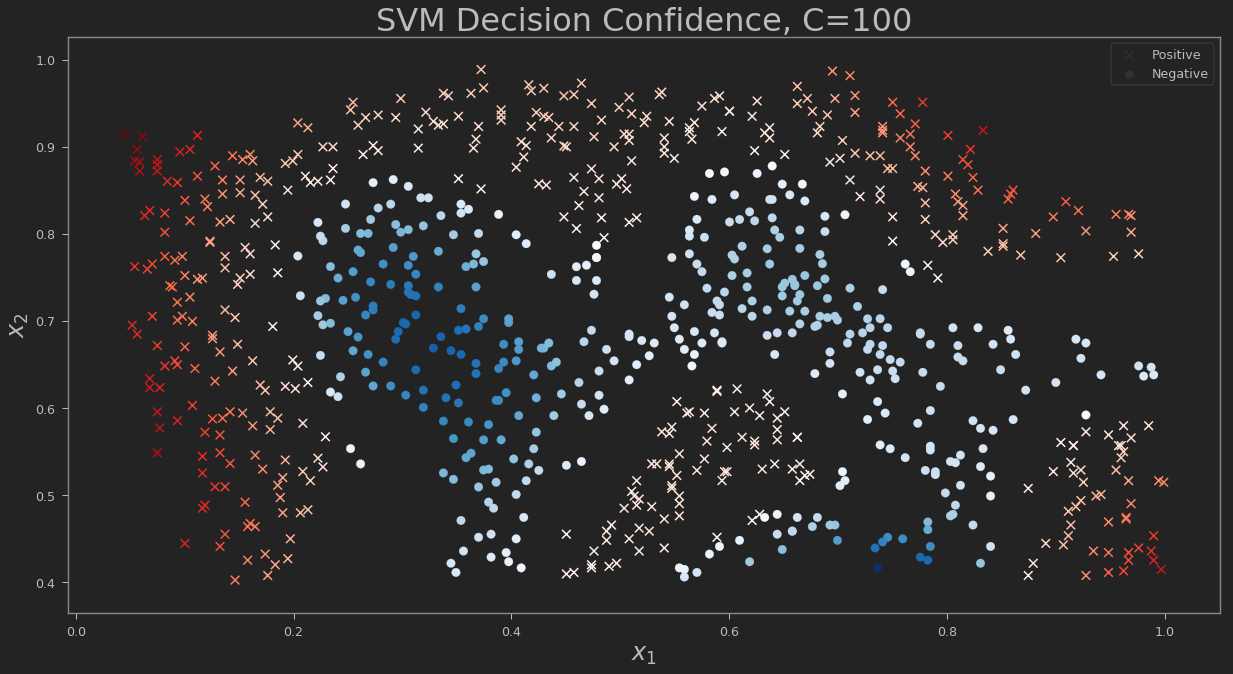

In [131]:
# Run the SVM
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(X,y)
confidence = svc.decision_function(X)

# Get the cases that were predicted positive or negative
pos = np.where(confidence>=0.0)[0]
neg = np.where(confidence<0.0)[0]

# Plot the data, colored by the confidence for each point
fig = plt.figure(figsize=(16,8));
ax = fig.add_axes([0,0,1,1]);
ax.scatter(X[pos,0],X[pos,1],s=75,marker='x',label='Positive',\
           c=svc.decision_function(X)[pos],cmap='Reds');
ax.scatter(X[neg,0],X[neg,1],s=75, marker='o', label='Negative',\
           c=-svc.decision_function(X)[neg],cmap='Blues');
ax.set_title('SVM Decision Confidence, C=100',fontsize=32);
ax.set_xlabel("$x_1$",fontsize=24);
ax.set_ylabel("$x_2$",fontsize=24);
ax.legend();

### Example Dataset 3

We'll have a look at a third dataset and this time use a cross-validation subset of the data to find the best parameters for the classifier.

#### Visualizing the data

Let's load the training data and have a look.

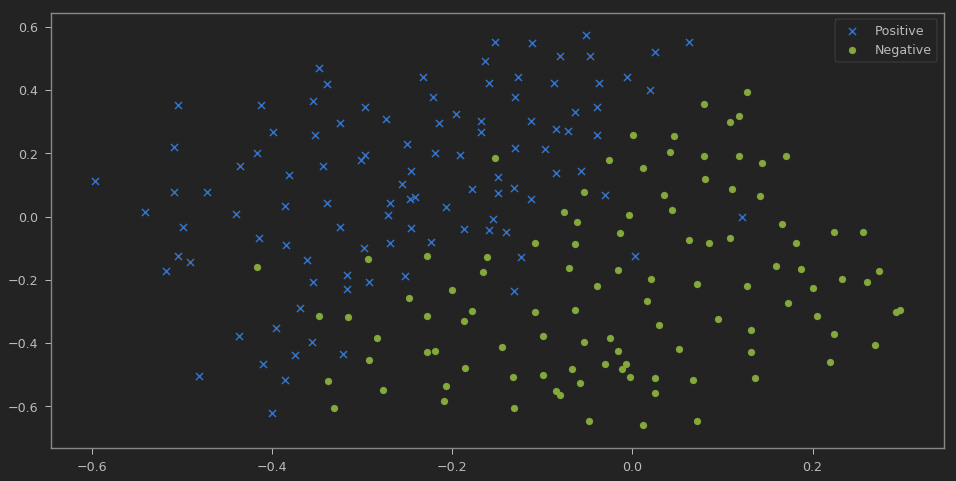

In [134]:
# Set the data path
dataDir = "./assignment/ex6/"
dataFile = "ex6data3.mat"
dataPath = dataDir+dataFile

# Load the data
data = loadmat(dataPath)
X = data['X']
XVal = data['Xval']
y = data['y']
yVal = data['yval']

# Get positive and negative cases
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot the data
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[pos,0],X[pos,1], s=50, marker='x', label='Positive');
ax.scatter(X[neg,0],X[neg,1], s=50, marker='o', label='Negative');
ax.legend();

#### Finding the Best Parameters

Now let's provide a list of parameters to check and find the best fit to the validation dataset.

In [137]:
# Provide a list of parameters for the SVM
CList = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gammaList = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

# Initialize the items to store the results
bestScore = 0
bestParams = {'C': None, 'gamma': None}

# Loop through options and find the best values
for C in CList:
    for gamma in gammaList:
        
        # Run the SVM on the training set
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        
        # Test the score on the validation set
        score = svc.score(XVal, yVal)
        
        # Keep the best score and parameters
        if score > bestScore:
            bestScore = score
            bestParams['C'] = C
            bestParams['gamma'] = gamma

#### Running the Model with the Best Parameters

Now let's have a look at how it performs back on the training data.

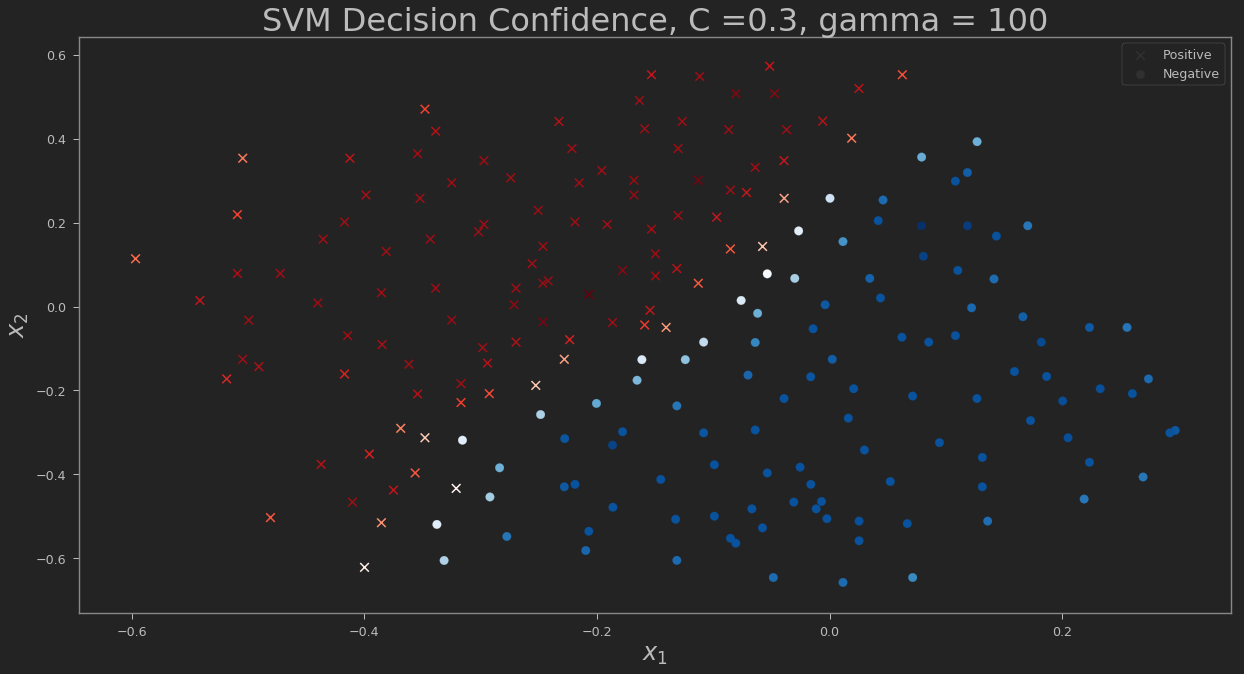

In [140]:
# Run the SVM
svc = svm.SVC(C=bestParams['C'], gamma=bestParams['gamma'], probability=True)
svc.fit(X,y)
confidence = svc.decision_function(X)

# Get the cases that were predicted positive or negative
pos = np.where(confidence>=0.0)[0]
neg = np.where(confidence<0.0)[0]

# Plot the data, colored by the confidence for each point
fig = plt.figure(figsize=(16,8));
ax = fig.add_axes([0,0,1,1]);
ax.scatter(X[pos,0],X[pos,1],s=75,marker='x',label='Positive',\
           c=svc.decision_function(X)[pos],cmap='Reds');
ax.scatter(X[neg,0],X[neg,1],s=75, marker='o', label='Negative',\
           c=-svc.decision_function(X)[neg],cmap='Blues');
ax.set_title('SVM Decision Confidence, C ='+str(bestParams['C'])+", gamma = "+str(bestParams['gamma']),
             fontsize=32);
ax.set_xlabel("$x_1$",fontsize=24);
ax.set_ylabel("$x_2$",fontsize=24);
ax.legend();